In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
#import pandas as pd

In [3]:
#%matplotlib notebook

 # Video i/p 

In [4]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata - 14_v3/0 - 2020-02-11 12-49-00-846.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")

#cap = cv2.VideoCapture("C:/Users/shrin/Desktop/openpose-master/openpose-master/build/examples/tutorial_api_python/abhilash.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

1477.0

In [5]:
cap.set(cv2.CAP_PROP_POS_FRAMES,350)

True

In [6]:
%matplotlib notebook

In [7]:
bg = cv2.imread("4MP_v2_withoutslab.jpg",0) 

(1520, 2592, 3)
(1520, 2592, 3)


<IPython.core.display.Javascript object>


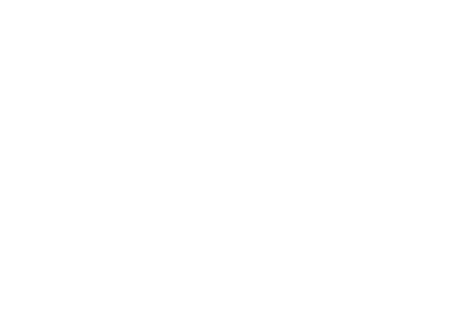

In [8]:
ret, frame = cap.read()
#imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
#resized = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), interpolation=cv2.INTER_LINEAR)
#print(frame.shape)
#frame = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), cv2.INTER_AREA)
print(frame.shape)
plt.imshow(frame)

In [9]:
#cv2.imwrite("4MP_v2_withoutslab.jpg",frame)

In [10]:
306,1120,2146,1120

(306, 1120, 2146, 1120)

In [11]:
#frame[:,2122:] = 0 
frame[:,1850:] = 0

In [12]:
plt.imshow(frame)

In [13]:
[358,1200,1958,1200]

[308,888,1455,888]
#%matplotlib notebook

[308, 888, 1455, 888]

In [14]:
#cv2.imwrite("toTatat1.jpg",frame)

In [15]:
#%matplotlib notebook

# pixels Per Metric

In [16]:
#alar = [682,708,1095,685]
#alar = [510-9,800,1126-9,800]
#alar = [308,651,1203,651]
#alar = [257,647,1390,647]
#alar = [162,647,1548,647]
#alar = [325,1259,3111,1259] # 2x
#alar = [176,771,1330,771]
#alar = [313,888,1455 - 20,888]

#alar = [313,888-100,1455 - 20,888-100]



#alar = [358,1200 - 150 +20 ,1958,1200 - 150 +20  ] # 4mp


alar = [306 ,1120 -70 ,2146 ,1120 - 40] # 4MP_v3

In [17]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


0.9183562048583978 <<<<<-----------------MM per Pix


In [18]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
hh,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

#randv = np.dstack((r,v),)
randv = cv2.addWeighted(y, -1.56, r, 2.8, 0.0)
print(randv.shape)

dst = cv2.addWeighted(y, 0, randv, 1.3, 0.0)
dst = cv2.line(dst,(alar[0],alar[1]),(alar[2],alar[3]),255,13)
#dst = cv2.addWeighted(v, .02, r, 1.6, 0.0)
print(dst.shape,"<- - dst")
plt.imshow(b)

(1520, 2592)
(1520, 2592) <- - dst


In [19]:
%matplotlib notebook

In [20]:
print(time.localtime(0))

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=5, tm_min=30, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)


In [21]:
import csv

leftCor = []
rightCor = []
save = []
while(True):
    ret, img = cap.read()
    
    #img = cv2.resize(img,(img.shape[1] ,img.shape[0] ), cv2.INTER_AREA)
    
     
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # BG SUB
    #bgsub = cv2.absdiff(gray,bg)
    
    b,g,r = cv2.split(img.copy()) 
    #hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    #h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2YUV)
    y,u,vb = cv2.split(yuv)
    
    randv = cv2.addWeighted(y, .5, b, 3.0, 0.0)  #good 220
    #print(randv.shape)
    #bgsub = cv2.absdiff(gray,randv)
    
    #randv = cv2.addWeighted(y, -1.56 , r, 2.9, 0.0)
    dst = cv2.addWeighted(y, 0.005, randv, 1.5, 0.0)
    #dst = cv2.addWeighted(v, .02, r, 1.251, 0.0) # threh 190
    
    bgsub = cv2.absdiff(bg,r)
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    
    
    _,thresh = cv2.threshold(blur,220,255,cv2.THRESH_BINARY )
    thresh[:,2270:] = 0
    #thresh[:,1850:] = 0
    #thresh[:,:200] = 0
    
    
    val = alar[1]
    
    
    """---------------------------------------------------------------------------------------------------------"""
    
    x1 = gray[val:] - bgsub[val:]
    #print(x1,"<-")
    
    
    """---------------------------------------------------------------------------------------------------------"""
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1] 
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix,",_______________________________")
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]) ,alar[3]),(255),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2 , (200,255,155), 2 , cv2.LINE_AA)
        
        #------------------------------------to csv--------------------------------------------#
        #mmPpix_time = pd.DataFrame([[int(mmPpix),time.asctime( time.localtime(time.time()))]])
        
        #mmPpix_time.to_csv('testData.csv', mode='a+', header=False,index=False)
        '''with open('testData.csv', 'a+', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(mmPpix_time)'''
        
    
    #img1 = cv2.resize(img ,(int(1920),int(1080)))
    #img2 = cv2.resize(dstCnt,(500,300))
    #img3 = cv2.resize(thresh,(500,300))
    #save.append(img1)
    #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img1 = cv2.resize(img ,(int(1920),int(1080)))
    thresh1 = cv2.resize(thresh ,(int(1920),int(1080)))
    bgsub1 = cv2.resize(bgsub ,(int(1920),int(1080)))
    cv2.imshow('thresh ',thresh1)
    cv2.imshow('imgzzz ',img1)
    cv2.imshow('bgsub',bgsub1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [22]:
leftCor = []
rightCor = []
save = []
while(True):
    ret, img = cap.read()
    
    #img = cv2.resize(img,(img.shape[1] ,img.shape[0] ), cv2.INTER_AREA)
    
     
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # BG SUB
    bgsub = cv2.absdiff(gray,bg)
    
    b,g,r = cv2.split(img.copy()) 
    #hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    #h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2YUV)
    y,u,vb = cv2.split(yuv)
    
    randv = cv2.addWeighted(y, .5, b, 2.3, 0.0)  #good 220
    #print(randv.shape)
    
    #randv = cv2.addWeighted(y, -1.56 , r, 2.9, 0.0)
    dst = cv2.addWeighted(y, 0, randv, 1.3, 0.0)
    #dst = cv2.addWeighted(v, .02, r, 1.251, 0.0) # threh 190
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    
    blur = cv2.dilate(blur,(5,5),iterations = 3)
    
    _,thresh = cv2.threshold(blur,220,255,cv2.THRESH_BINARY )
    
    thresh[:,2465:] = 0
    #thresh[:,1850:] = 0
    #thresh[:,:200] = 0
    
    
    val = alar[1]
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1] 
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix,",_______________________________")
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]) ,alar[3]),(255),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2 , (200,255,155), 2 , cv2.LINE_AA)
        #mmPpix_time = pd.DataFrame([[int(mmPpix),time.asctime( time.localtime(time.time()))]])
        
        #mmPpix_time.to_csv('testData.csv', mode='a+', header=False,index=False)
        '''with open('testData.csv', 'a+', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(mmPpix_time)'''
        
    
    #img1 = cv2.resize(img ,(int(1920),int(1080)))
    #img2 = cv2.resize(dstCnt,(500,300))
    #img3 = cv2.resize(thresh,(500,300))
    #save.append(img1)
    #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img1 = cv2.resize(img ,(int(1920),int(1080)))
    thresh1 = cv2.resize(thresh ,(int(1920),int(1080)))
    bgsub1 = cv2.resize(bgsub ,(int(1920),int(1080)))
    cv2.imshow('thresh',thresh1)
    cv2.imshow('imgzzz ',img1)
    cv2.imshow('bgsub ',bgsub1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1371.1058138535877 ,_______________________________
leftSide =  957 rightSide =  2450
[221 228 235 ...  81 123 207]
1945.9967980949448 ,_______________________________
leftSide =  331 rightSide =  2450
[229 250 255 ...  95 137 196]
1946.9151542998031 ,_______________________________
leftSide =  330 rightSide =  2450
[227 255 255 ...  95 137 196]
1947.8335105046617 ,_______________________________
leftSide =  329 rightSide =  2450
[239 255 255 ...  95 137 196]
1952.4252915289537 ,_______________________________
leftSide =  324 rightSide =  2450
[221 239 253 ...  94 137 198]
1953.343647733812 ,_______________________________
leftSide =  323 rightSide =  2450
[237 250 255 ...  94 137 198]
1669.571580432567 ,_______________________________
leftSide =  323 rightSide =  2141
[222 244 255 ... 230 242 250]
1670.4899366374254 ,_______________________________
leftSide =  322 rightSide =  2141
[225 249 255 ... 231 242 249]
1782.52939363015 ,_______________________________
leftSide =  321 rightSid

[238 251 255 ... 244 243 240]
1631.0006198285143 ,_______________________________
leftSide =  292 rightSide =  2068
[238 251 255 ... 244 243 240]
1631.0006198285143 ,_______________________________
leftSide =  292 rightSide =  2068
[238 251 255 ... 244 243 240]
1631.0006198285143 ,_______________________________
leftSide =  292 rightSide =  2068
[238 251 255 ... 244 243 240]
1631.0006198285143 ,_______________________________
leftSide =  292 rightSide =  2068
[238 251 255 ... 244 243 240]
1631.0006198285143 ,_______________________________
leftSide =  292 rightSide =  2068
[238 251 255 ... 244 243 240]
1631.0006198285143 ,_______________________________
leftSide =  292 rightSide =  2068
[238 251 255 ... 244 243 240]
1631.0006198285143 ,_______________________________
leftSide =  292 rightSide =  2068
[238 251 255 ... 244 243 240]
1630.082263623656 ,_______________________________
leftSide =  292 rightSide =  2067
[238 251 255 ... 246 244 243]
1630.082263623656 ,________________________

1612.6334957313466 ,_______________________________
leftSide =  299 rightSide =  2055
[227 235 243 ... 232 237 233]
1611.715139526488 ,_______________________________
leftSide =  300 rightSide =  2055
[230 238 246 ... 232 237 233]
1611.715139526488 ,_______________________________
leftSide =  300 rightSide =  2055
[227 236 245 ... 232 237 233]
1611.715139526488 ,_______________________________
leftSide =  300 rightSide =  2055
[227 236 245 ... 232 237 233]
1611.715139526488 ,_______________________________
leftSide =  300 rightSide =  2055
[227 236 245 ... 232 237 233]
1611.715139526488 ,_______________________________
leftSide =  300 rightSide =  2055
[227 236 245 ... 232 237 233]
1611.715139526488 ,_______________________________
leftSide =  300 rightSide =  2055
[227 236 245 ... 232 237 233]
1611.715139526488 ,_______________________________
leftSide =  300 rightSide =  2055
[227 236 245 ... 232 237 233]
1611.715139526488 ,_______________________________
leftSide =  300 rightSide = 

1599.776508863329 ,_______________________________
leftSide =  302 rightSide =  2044
[228 229 227 ... 225 223 222]
1599.776508863329 ,_______________________________
leftSide =  302 rightSide =  2044
[228 229 227 ... 225 223 222]
1599.776508863329 ,_______________________________
leftSide =  302 rightSide =  2044
[228 229 227 ... 225 223 222]
1599.776508863329 ,_______________________________
leftSide =  302 rightSide =  2044
[228 229 227 ... 225 223 222]
1599.776508863329 ,_______________________________
leftSide =  302 rightSide =  2044
[228 229 227 ... 225 223 222]
1599.776508863329 ,_______________________________
leftSide =  302 rightSide =  2044
[228 229 227 ... 225 223 222]
1617.2252767556383 ,_______________________________
leftSide =  301 rightSide =  2062
[245 253 253 ... 233 234 227]
1616.30692055078 ,_______________________________
leftSide =  302 rightSide =  2062
[241 250 253 ... 233 234 227]
1616.30692055078 ,_______________________________
leftSide =  302 rightSide =  2

1522.6345876552234 ,_______________________________
leftSide =  309 rightSide =  1967
[223 234 229 ... 230 227 225]
1522.6345876552234 ,_______________________________
leftSide =  309 rightSide =  1967
[223 234 229 ... 230 227 225]
1522.6345876552234 ,_______________________________
leftSide =  309 rightSide =  1967
[223 234 229 ... 230 227 225]
1522.6345876552234 ,_______________________________
leftSide =  309 rightSide =  1967
[223 234 229 ... 230 227 225]
1522.6345876552234 ,_______________________________
leftSide =  309 rightSide =  1967
[223 234 229 ... 230 227 225]
1522.6345876552234 ,_______________________________
leftSide =  309 rightSide =  1967
[223 234 229 ... 230 227 225]
1528.1447248843738 ,_______________________________
leftSide =  309 rightSide =  1973
[223 234 229 ... 220 218 221]
1528.1447248843738 ,_______________________________
leftSide =  309 rightSide =  1973
[223 234 229 ... 220 218 221]
1528.1447248843738 ,_______________________________
leftSide =  309 righ

In [23]:
break

SyntaxError: 'break' outside loop (<ipython-input-23-6aaf1f276005>, line 4)

In [ ]:
cv2.__version__

In [ ]:
import scipy


In [ ]:
mmPpix_time

In [ ]:
scipy.__version__

In [ ]:
print(len(np.nonzero(thresh[val,])[0]))

In [ ]:
a = pd.DataFrame(np.nonzero(thresh[val,])[0])

In [ ]:
time.today()

In [ ]:
from datetime import date
date.ctime()

In [ ]:
x = time.asctime( time.localtime(time.time()) )

In [ ]:
time.asctime( time.localtime(time.time()) ) 

In [ ]:
int(mmPpix)

In [ ]:
int(x[-13:-11])

In [ ]:
x[-10:-8]

In [ ]:
cv2.absdiff()

In [ ]:
plt.imshow(bgsub,"gray")

In [ ]:

x1[x1 > 50] = 1
#x1[x1 <= 50] = 0

In [ ]:
np.nonzero(x1)[0][0]